In [ ]:
from google.colab import drive
import os
drive.mount('drive/')

In [ ]:
from google.colab import drive
import os
drive.mount('drive/')

In [ ]:
os.chdir('/content/drive/MyDrive/Applied Machine Learning/Sydney-Housing/')

In [ ]:
ls 

In [ ]:
from sklearn.linear_model import ridge, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, LeaveOneOut, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.ridge module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


Determination of which features are continuous and which are categorical.

In [ ]:
# Splitting data into features
c_data = fetch_openml('credit-g', version='active')
c_data.feature_names

['checking_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

In [ ]:
# Splitting data into categories
c_data.categories

{'checking_status': ['<0', '0<=X<200', '>=200', 'no checking'],
 'credit_history': ['no credits/all paid',
  'all paid',
  'existing paid',
  'delayed previously',
  'critical/other existing credit'],
 'employment': ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'],
 'foreign_worker': ['yes', 'no'],
 'housing': ['rent', 'own', 'for free'],
 'job': ['unemp/unskilled non res',
  'unskilled resident',
  'skilled',
  'high qualif/self emp/mgmt'],
 'other_parties': ['none', 'co applicant', 'guarantor'],
 'other_payment_plans': ['bank', 'stores', 'none'],
 'own_telephone': ['none', 'yes'],
 'personal_status': ['male div/sep',
  'female div/dep/mar',
  'male single',
  'male mar/wid',
  'female single'],
 'property_magnitude': ['real estate',
  'life insurance',
  'car',
  'no known property'],
 'purpose': ['new car',
  'used car',
  'furniture/equipment',
  'radio/tv',
  'domestic appliance',
  'repairs',
  'education',
  'vacation',
  'retraining',
  'business',
  'other'],
 'savings_status':

Visualization of the univariate distribution of each continuous feature, and the distribution of the target.

In [ ]:
# Essentially questions that can be answered with a simple yes or no excluding integers would be classified as categorical, everything else that involves integers would be classified as continuous
# I will now plot the data frame  for features
c_dataframe = pd.DataFrame(c_data.data,columns=c_data.feature_names)
c_dataframe['class'] = c_data.target
c_dataframe.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,4.0,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,good
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,bad
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,3.0,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,good
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,4.0,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,good
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,4.0,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,bad


In [ ]:
# Now that I have plotted all features, I will define all continuous functions so I can plot it seperately
num_dep_data = c_dataframe ['num_dependents']
dur_data = c_dataframe ['duration']
crd_amt_data = c_dataframe ['credit_amount']
age_data = c_dataframe ['age']
exs_credits_data = c_dataframe ['existing_credits']
ins_com_data = c_dataframe ['installment_commitment']
res_sin_data = c_dataframe ['residence_since']

<function matplotlib.pyplot.show>

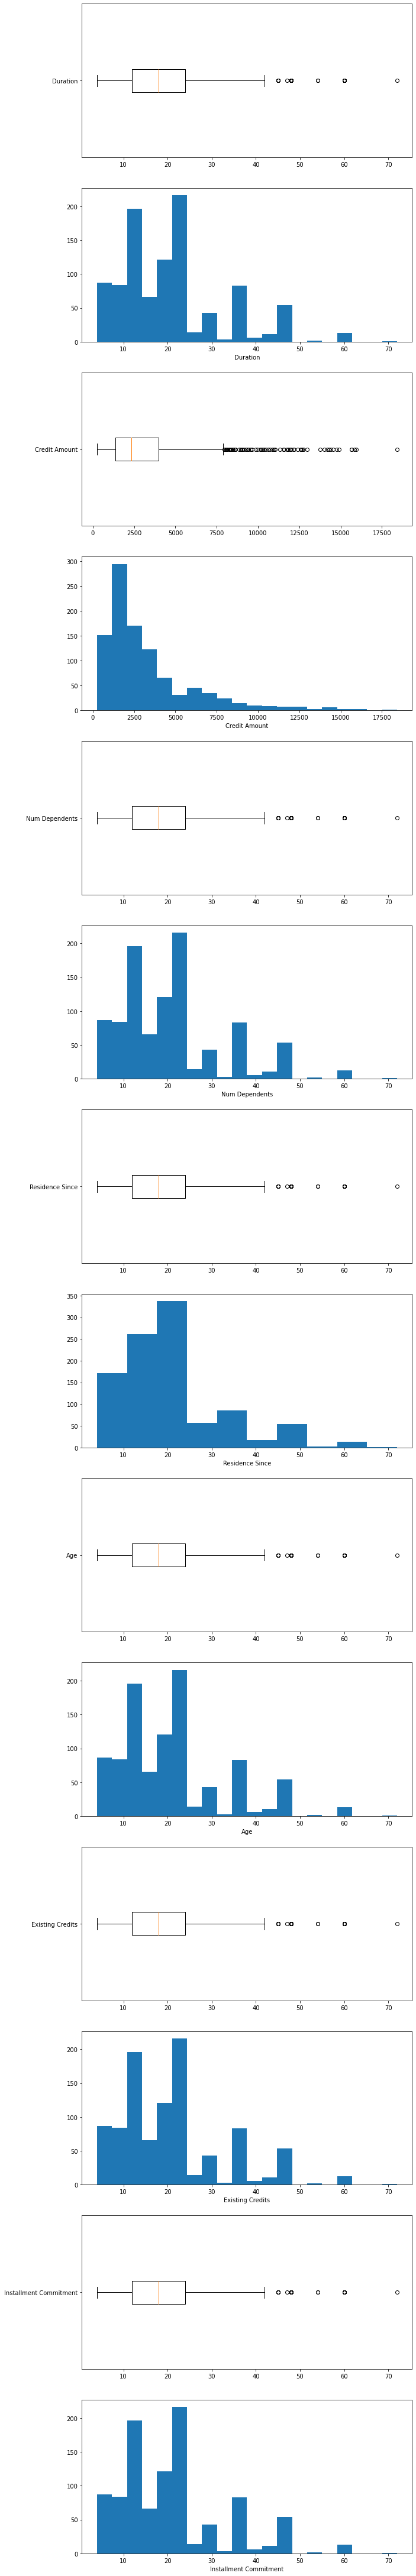

In [ ]:
plt.figure(figsize=(10,30))

# Plots for each Continuous item
# Duration Plot 
ax11 = plt.subplot(14,1,1)
ax11.boxplot(dur_data, vert=False)
ax11.set_yticklabels(['Duration'])

ax12 = plt.subplot(14,1,2)
ax12.hist(dur_data,bins=20)
ax12.set_xlabel('Duration')

# Credit_Amount Plot
ax13 = plt.subplot(14,1,3)
ax13.boxplot(crd_amt_data, vert=False)
ax13.set_yticklabels(['Credit Amount'])

ax13 = plt.subplot(14,1,4)
ax13.hist(crd_amt_data,bins=20)
ax13.set_xlabel('Credit Amount')

# Num_Dependent Plot
ax14 = plt.subplot(14,1,5)
ax14.boxplot(dur_data, vert=False)
ax14.set_yticklabels(['Num Dependents'])

ax14 = plt.subplot(14,1,6)
ax14.hist(dur_data,bins=20)
ax14.set_xlabel('Num Dependents')

# Residence_Since Plot
ax15 = plt.subplot(14,1,7)
ax15.boxplot(dur_data, vert=False)
ax15.set_yticklabels(['Residence Since'])

ax15 = plt.subplot(14,1,8)
ax15.hist(dur_data, bins = 10)
ax15.set_xlabel('Residence Since')

# Age Plot
ax16 = plt.subplot(14,1,9)
ax16.boxplot(dur_data, vert=False)
ax16.set_yticklabels(['Age'])

ax16 = plt.subplot(14,1,10)
ax16.hist(dur_data, bins=20)
ax16.set_xlabel('Age')

# Existing Credits 
ax17 = plt.subplot(14,1,11)
ax17.boxplot(dur_data, vert=False)
ax17.set_yticklabels(['Existing Credits'])

ax17 = plt.subplot(14,1,12)
ax17.hist(dur_data, bins=20)
ax17.set_xlabel('Existing Credits')

# Installment Commitment
ax18 = plt.subplot(14,1,13)
ax18.boxplot(dur_data, vert=False)
ax18.set_yticklabels(['Installment Commitment'])

ax18 = plt.subplot(14,1,14)
ax18.hist(dur_data, bins=20)
ax18.set_xlabel('Installment Commitment')



plt.subplots_adjust(top=2, bottom=0.004)

plt.show

Text(0.5, 0, 'Class')

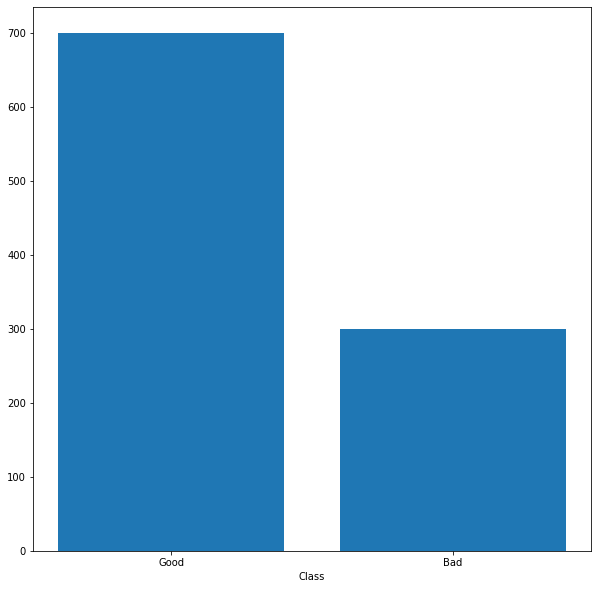

In [ ]:
#I will now plot the target data
class_ = c_dataframe['class']
num_good = class_[class_ == 'good']
num_bad = class_[class_ == 'bad']
labels = ['Good', 'Bad']
y_pos = np.arange(2)
x_values = [len(num_good), len(num_bad)]
plt.figure(figsize=(10, 10))
plt.bar(y_pos, x_values)
plt.xticks(np.arange(2), ('Good', 'Bad'))
plt.xlabel('Class')

Creating training and test splits

In [ ]:
# This is where I will pre-process the data
# Defining categorical features, and using as_frame to convert the dataset to a dataframe
c_dataX, c_datay, = fetch_openml('credit-g', version='active', as_frame=True, return_X_y=True)
categorical_features = ['checking_status', 'credit_history', 'employment', 'foreign_worker',
'housing',
'job',
'other_parties',
'other_payment_plans',
'own_telephone',
'personal_status',
'property_magnitude',
'purpose',
'savings_status']
# I will now use .iteritems to print the specific columns and use .cat.codes to convert categorical variables to numbers. This will enforce order on the following categories
c_dataX_ordinal = c_dataX.copy()
for feature in c_dataX.iteritems():
    if feature[0] in categorical_features:
        c_dataX_ordinal[feature[0]] = c_dataX[feature[0]].astype("category").cat.codes

In [ ]:
c_dataX_ordinal.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0,6.0,4,3,1169.0,4,4,4.0,2,0,4.0,0,67.0,2,1,2.0,2,1.0,1,0
1,1,48.0,2,3,5951.0,0,2,2.0,1,0,2.0,0,22.0,2,1,1.0,2,1.0,0,0
2,3,12.0,4,6,2096.0,0,3,2.0,2,0,3.0,0,49.0,2,1,1.0,1,2.0,0,0
3,0,42.0,2,2,7882.0,0,3,2.0,2,2,4.0,1,45.0,2,2,1.0,2,2.0,0,0
4,0,24.0,3,0,4870.0,0,2,3.0,2,0,4.0,3,53.0,2,2,2.0,2,2.0,0,0


In [ ]:
# I will now do label encoding on the target
label_encoding = LabelEncoder ()
y = label_encoding.fit_transform(c_datay)

In [ ]:
# Now I will do both training and test splits using threefold split
X_trainval, X_test, y_trainval, y_test, = train_test_split(c_dataX_ordinal,y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval)


In [ ]:
numeric_features = [feature for feature in c_data.feature_names if feature not in categorical_features]

In [ ]:
scaler = StandardScaler()
X_train_scaled = X_train
X_train_scaled[numeric_features] = scaler.fit_transform(X_train_scaled[numeric_features])

X_val_scaled = X_val
X_val_scaled[numeric_features] = scaler.fit_transform(X_val_scaled[numeric_features])

logistic_regression = LogisticRegression().fit(X_train, y_train)
logistic_regression.predict(X_val)
logistic_regression.score(X_val, y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

0.75

Using ColumnTransformer and pipeline to encode categorical variables 

In [ ]:
# As assigned I will now use the pipeline method to encode variable
X_trainval_pipe, X_test_pipe, y_trainval_pipe, y_test_pipe = train_test_split(c_dataX, c_datay)

# I will now use the Stratified Kfold method as we do have predefined classes
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True)


KNN


In [ ]:
# Testing different methods with scaling my data and without scaling my data

# KNN
prep_knn = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_knn = make_pipeline(prep_knn, KNeighborsClassifier())
model_knn.fit(X_trainval_pipe, y_trainval_pipe)
scores_knn = cross_val_score(model_knn, X_trainval_pipe, y_trainval_pipe, cv=stratified_kf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knn)))

score: 0.709


In [ ]:
# KNN Scaled
prep_knns = make_column_transformer(
    (StandardScaler(),numeric_features),
    (OneHotEncoder(), categorical_features))
model_knns = make_pipeline(prep_knns, KNeighborsClassifier())
model_knns.fit(X_trainval_pipe, y_trainval_pipe)
scores_knns = cross_val_score(model_knns, X_trainval_pipe, y_trainval_pipe, cv=stratified_kf, scoring='accuracy')
print("score: {:.3f}" .format(np.mean(scores_knns)))
                                   

score: 0.736


Logistic Regressions 


In [ ]:
# Logistic Regressions
prep_lr = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_lr = make_pipeline(prep_lr, LogisticRegression())
model_lr.fit(X_trainval_pipe, y_trainval_pipe)
scores_lr = cross_val_score(model_lr, X_trainval_pipe, y_trainval_pipe, cv=stratified_kf, scoring = 'accuracy')
print("score: {:.3f}" .format(np.mean(scores_lr)))


score: 0.729


In [ ]:
# Logistic Regressions Scaled
prep_lrs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_lrs = make_pipeline(prep_lrs, LogisticRegression())
model_lrs.fit(X_trainval_pipe, y_trainval_pipe)
scores_lrs = cross_val_score(model_lrs, X_trainval_pipe, y_trainval_pipe, cv=stratified_kf, scoring = 'accuracy')
print("score: {:.3f}" .format(np.mean(scores_lrs)))


score: 0.735


Linear Scaling Vectors


In [ ]:
# Linear Scaling Vector
prep_lsv = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_lsv = make_pipeline(prep_lsv, LinearSVC())
model_lsv.fit(X_trainval_pipe, y_trainval_pipe)
scores_lsv = cross_val_score(model_lsv, X_trainval_pipe, y_trainval_pipe, cv = stratified_kf, scoring='accuracy')
print("score: {:.3f}" .format(np.mean(scores_lsv)))

score: 0.717


In [ ]:
# Linear Scaling Vector Scaled
prep_lsvs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_lsvs = make_pipeline(prep_lsvs, LinearSVC(max_iter=5000))
model_lsvs.fit(X_trainval_pipe, y_trainval_pipe)
scores_lsvs = cross_val_score(model_lsvs, X_trainval_pipe, y_trainval_pipe, cv=stratified_kf, scoring = 'accuracy')
print("score: {:.3f}" .format(np.mean(scores_lsvs)))

score: 0.748


Tuning the parameters using GridSearchCV


In [ ]:
X_trainval, X_test, y_trainval, y_test, = train_test_split(c_dataX_ordinal, y)

In [ ]:
# KNN Tuned
knn_pipe = make_pipeline(StandardScaler(),KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': range(10, 20)}
grid = GridSearchCV(knn_pipe, param_grid, cv=stratified_kf, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.746
best parameters: {'kneighborsclassifier__n_neighbors': 10}


In [ ]:
# Plugging Tuned Parameters into original KNN pipeline 
preprocess_knns = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_knns = make_pipeline(preprocess_knns, KNeighborsClassifier(n_neighbors=10))
model_knns.fit(X_trainval_pipe, y_trainval_pipe)
scores_knns = cross_val_score(model_knns, X_trainval_pipe, y_trainval_pipe, cv=stratified_kf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knns)))

score: 0.732


In [ ]:
# SVC Tuned
svc_pipe = make_pipeline(StandardScaler(), LinearSVC())
param_grid = {'linearsvc__C': np.logspace(-10, 5, 20)}
grid_svc = GridSearchCV(svc_pipe, param_grid, cv=stratified_kf, scoring='accuracy', return_train_score=True)
grid_svc.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svc.best_score_))
print("best parameters: {}".format(grid_svc.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score: 0.752
best parameters: {'linearsvc__C': 0.04832930238571752}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Plugging back into SVC pipeline
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC(C=0.04832930238571752))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=stratified_kf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svcs)))


score: 0.736


In [ ]:
# Logistic Regression tuning
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {"logisticregression__C" : np.logspace(-4, 20, 20)}
grid_lr = GridSearchCV(lr_pipe, param_grid, cv=stratified_kf, return_train_score=True)
grid_lr.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lr.best_score_))
print("best parameters: {}".format(grid_lr.best_params_))

best mean cross-validation score: 0.751
best parameters: {'logisticregression__C': 0.615848211066026}


In [ ]:
# Plugging back into LR pipeline
preprocess_lrs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_lrs = make_pipeline(preprocess_lrs, LogisticRegression(C=0.615848211066026))
model_lrs.fit(X_trainval_pipe, y_trainval_pipe)
scores_lrs = cross_val_score(model_lrs, X_trainval_pipe, y_trainval_pipe, cv=stratified_kf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lrs)))

score: 0.752


Performance Visualization


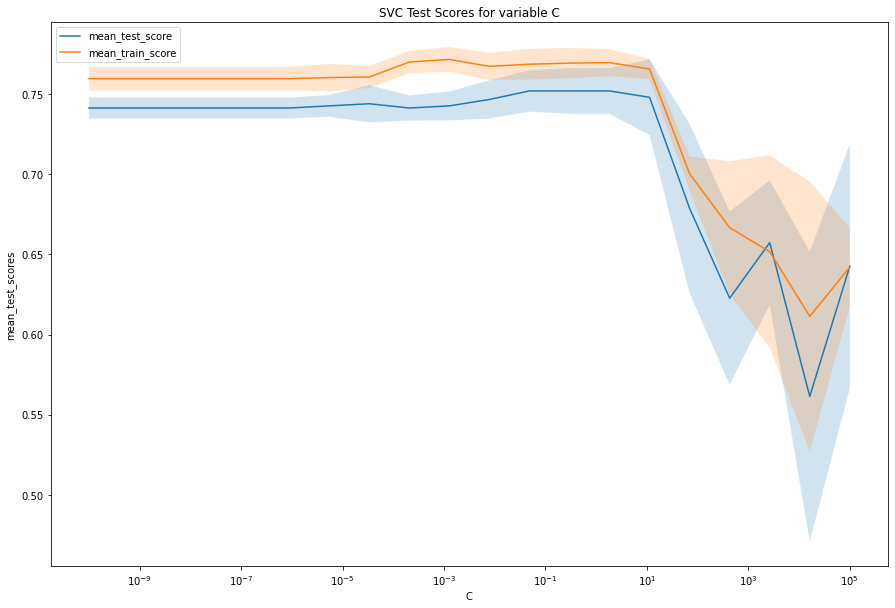

In [ ]:
# SVC
svc_c_values = np.logspace(-10, 5, 20)
svc_mean_test_scores = np.asarray(grid_svc.cv_results_['mean_test_score'])
svc_mean_train_scores = np.asarray(grid_svc.cv_results_['mean_train_score'])
std_test = np.asarray(grid_svc.cv_results_['std_test_score'])
std_train = np.asarray(grid_svc.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(svc_c_values, svc_mean_test_scores, label='mean_test_score')
ax.plot(svc_c_values, svc_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(svc_c_values, svc_mean_test_scores + std_test, svc_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(svc_c_values, svc_mean_train_scores+std_train, svc_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='SVC Test Scores for variable C')
ax.legend(loc='upper left')

plt.show()

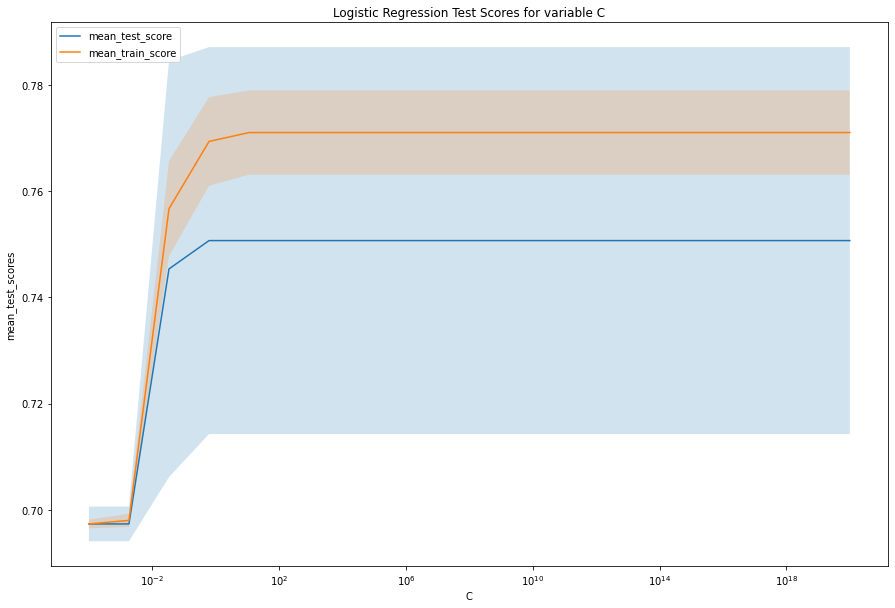

In [ ]:
# LR
lr_cvalues = np.logspace(-4, 20, 20)
lr_mean_test_scores = np.asarray(grid_lr.cv_results_['mean_test_score'])
lr_mean_train_scores = np.asarray(grid_lr.cv_results_['mean_train_score'])
std_test = np.asarray(grid_lr.cv_results_['std_test_score'])
std_train = np.asarray(grid_lr.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(lr_cvalues, lr_mean_test_scores, label='mean_test_score')
ax.plot(lr_cvalues, lr_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(lr_cvalues, lr_mean_test_scores + std_test, lr_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(lr_cvalues, lr_mean_train_scores+std_train, lr_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='Logistic Regression Test Scores for variable C')
ax.legend(loc='upper left')

plt.show()

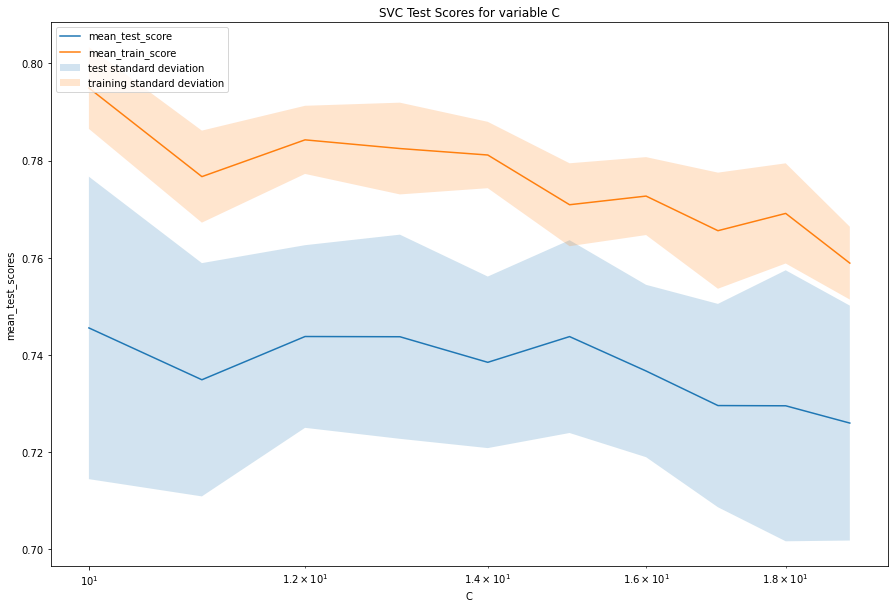

In [ ]:
# KNN
knn_c_values = range(10, 20)
knn_mean_test_scores = np.asarray(grid.cv_results_['mean_test_score'])
knn_mean_train_scores = np.asarray(grid.cv_results_['mean_train_score'])
std_test = np.asarray(grid.cv_results_['std_test_score'])
std_train = np.asarray(grid.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(knn_c_values, knn_mean_test_scores, label='mean_test_score')
ax.plot(knn_c_values, knn_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(knn_c_values, knn_mean_test_scores + std_test, knn_mean_test_scores - std_test, alpha=0.2, label='test standard deviation')
ax.fill_between(knn_c_values, knn_mean_train_scores+std_train, knn_mean_train_scores-std_train, alpha=0.2, label='training standard deviation')

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='SVC Test Scores for variable C')
ax.legend(loc='upper left')

plt.show()

Shift from stratified K-fold to K-fold


In [ ]:
kfold1 = KFold(n_splits=5, shuffle=True, random_state=0)
kfold2 = KFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
# LR 
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(C=0.615848211066026))
param_grid = {"logisticregression__C" : np.logspace(-4, 20, 20)}
grid_lr = GridSearchCV(lr_pipe, param_grid, cv=stratified_kf, return_train_score=True)
grid_lr.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lr.best_score_))
print("best parameters: {}".format(grid_lr.best_params_))

grid_lrk1 = GridSearchCV(lr_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_lrk1.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lrk1.best_score_))
print("best parameters: {}".format(grid_lrk1.best_params_))

grid_lrk2 = GridSearchCV(lr_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_lrk2.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lrk2.best_score_))
print("best parameters: {}".format(grid_lrk2.best_params_))

best mean cross-validation score: 0.759
best parameters: {'logisticregression__C': 11.288378916846883}
best mean cross-validation score: 0.759
best parameters: {'logisticregression__C': 11.288378916846883}
best mean cross-validation score: 0.753
best parameters: {'logisticregression__C': 0.615848211066026}


In [ ]:
# SVC
svc_pipe = make_pipeline(StandardScaler(), LinearSVC(C=0.04832930238571752))
param_grid = {"linearsvc__C" : np.logspace(-10, 5, 20)}
grid_svc = GridSearchCV(svc_pipe, param_grid, cv=stratified_kf, return_train_score=True)
grid_svc.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svc.best_score_))
print("best parameters: {}".format(grid_svc.best_params_))

grid_svck1 = GridSearchCV(svc_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_svck1.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svck1.best_score_))
print("best parameters: {}".format(grid_svck1.best_params_))

grid_svck2 = GridSearchCV(svc_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_svck2.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svck2.best_score_))
print("best parameters: {}".format(grid_svck2.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score: 0.759
best parameters: {'linearsvc__C': 0.00020691380811147902}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score: 0.767
best parameters: {'linearsvc__C': 0.007847599703514624}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score: 0.756
best parameters: {'linearsvc__C': 0.04832930238571752}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# KNN
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))
param_grid = {'kneighborsclassifier__n_neighbors': range(10, 20)}

grid_knn = GridSearchCV(knn_pipe, param_grid, cv=stratified_kf, return_train_score=True)
grid_knn.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))

grid_knnk1 = GridSearchCV(knn_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_knnk1.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_knnk1.best_score_))
print("best parameters: {}".format(grid_knnk1.best_params_))

grid_knnk2 = GridSearchCV(knn_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_knnk2.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_knnk2.best_score_))
print("best parameters: {}".format(grid_knnk2.best_params_))

best mean cross-validation score: 0.724
best parameters: {'kneighborsclassifier__n_neighbors': 19}
best mean cross-validation score: 0.740
best parameters: {'kneighborsclassifier__n_neighbors': 15}
best mean cross-validation score: 0.731
best parameters: {'kneighborsclassifier__n_neighbors': 13}


Creating new test and training split


In [ ]:
X_trainval16, X_test16, y_trainval16, y_test16 = train_test_split(c_dataX_ordinal, y, random_state=10)

In [ ]:
# LR
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(C=0.03359818286283781))
param_grid = {"logisticregression__C" : np.logspace(-4, 20, 20)}
grid_lr = GridSearchCV(lr_pipe, param_grid, cv=stratified_kf, return_train_score=True)
grid_lr.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for Logistic regression Stratified K-Fold: {:.3f}".format(grid_lr.best_score_))
print("best parameters: {}".format(grid_lr.best_params_))

grid_lrk1 = GridSearchCV(lr_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_lrk1.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for Logistic regression K-fold with random state 0: {:.3f}".format(grid_lrk1.best_score_))
print("best parameters: {}".format(grid_lrk1.best_params_))

grid_lrk2 = GridSearchCV(lr_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_lrk2.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for Logistic regression K-fold with random state 1: {:.3f}".format(grid_lrk2.best_score_))
print("best parameters: {}".format(grid_lrk2.best_params_))

#SVC
svc_pipe = make_pipeline(StandardScaler(), LinearSVC(C=0.04832930238571752))
param_grid = {"linearsvc__C" : np.logspace(-10, 5, 20)}
grid_svc = GridSearchCV(svc_pipe, param_grid, cv=stratified_kf, return_train_score=True)
grid_svc.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score SVC Stratified K-Fold: {:.3f}".format(grid_svc.best_score_))
print("best parameters: {}".format(grid_svc.best_params_))

grid_svck1 = GridSearchCV(svc_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_svck1.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score SVC K-fold with random state 0: {:.3f}".format(grid_svck1.best_score_))
print("best parameters: {}".format(grid_svck1.best_params_))

grid_svck2 = GridSearchCV(svc_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_svck2.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score SVC K-fold with random state 1: {:.3f}".format(grid_svck2.best_score_))
print("best parameters: {}".format(grid_svck2.best_params_))


# KNN
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=12))
param_grid = {'kneighborsclassifier__n_neighbors': range(10, 20)}

grid_knn = GridSearchCV(knn_pipe, param_grid, cv=stratified_kf, return_train_score=True)
grid_knn.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for KNN Stratified K-Fold: {:.3f}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))

grid_knnk1 = GridSearchCV(knn_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_knnk1.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for KNN K-fold with random state 0: {:.3f}".format(grid_knnk1.best_score_))
print("best parameters: {}".format(grid_knnk1.best_params_))

grid_knnk2 = GridSearchCV(knn_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_knnk2.fit(X_trainval16, y_trainval16)
print("best mean cross-validation score for KNN K-fold with random state 1: {:.3f}".format(grid_knnk2.best_score_))
print("best parameters: {}".format(grid_knnk2.best_params_))

best mean cross-validation score for Logistic regression Stratified K-Fold: 0.757
best parameters: {'logisticregression__C': 0.615848211066026}
best mean cross-validation score for Logistic regression K-fold with random state 0: 0.756
best parameters: {'logisticregression__C': 0.03359818286283781}
best mean cross-validation score for Logistic regression K-fold with random state 1: 0.761
best parameters: {'logisticregression__C': 11.288378916846883}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score SVC Stratified K-Fold: 0.752
best parameters: {'linearsvc__C': 11.288378916846883}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score SVC K-fold with random state 0: 0.760
best parameters: {'linearsvc__C': 11.288378916846883}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

best mean cross-validation score SVC K-fold with random state 1: 0.763
best parameters: {'linearsvc__C': 0.007847599703514624}
best mean cross-validation score for KNN Stratified K-Fold: 0.757
best parameters: {'kneighborsclassifier__n_neighbors': 10}
best mean cross-validation score for KNN K-fold with random state 0: 0.759
best parameters: {'kneighborsclassifier__n_neighbors': 10}
best mean cross-validation score for KNN K-fold with random state 1: 0.747
best parameters: {'kneighborsclassifier__n_neighbors': 12}


Performance plotting of best coefficients for LR



In [ ]:
categorical_fe = c_dataX[categorical_features]
enc = OneHotEncoder()
enc.fit_transform(categorical_fe)
encoded_categories = list(enc.get_feature_names(categorical_features))
all_features = numeric_features + encoded_categories

In [ ]:
plr = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
mlr = make_pipeline(plr, LogisticRegression(C=0.03359818286283781))
mlr.fit(X_trainval_pipe, y_trainval_pipe)
coefficients = mlr.steps[1][1].coef_

In [ ]:
# Coversion of the above array into an array of tuples
coeff_tuples = []
for index, coeff in enumerate(coefficients[0]):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])

In [ ]:
best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

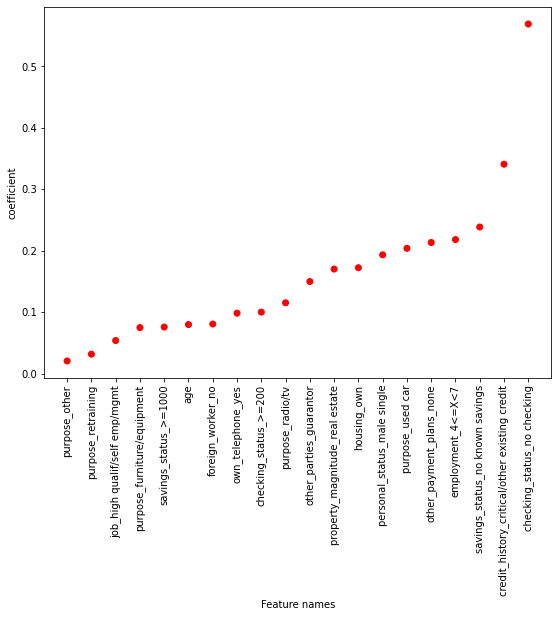

In [ ]:
coeffs = [tup[1] for tup in best_coeff]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()

Performance plotting of best coefficients for SVC


In [ ]:
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC(C=0.04832930238571752))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=stratified_kf, scoring='accuracy')
coefficients = model_svcs.steps[1][1].coef_

In [ ]:
coeff_tuples = []
for index, coeff in enumerate(coefficients[0]):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])
best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

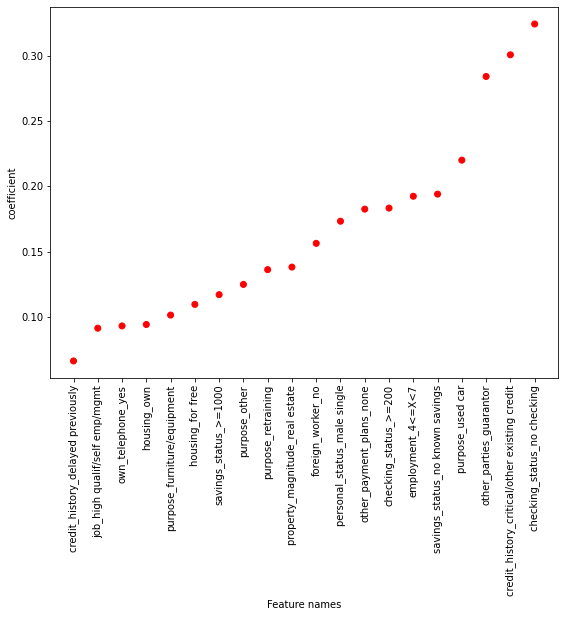

In [ ]:
plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()